In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [ ]:
data='/content/drive/MyDrive/image classsi'

In [ ]:
os.listdir(data)

['batman', 'spiderman']

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data,batch_size=12)

Found 80 files belonging to 2 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data_iterator=data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(12, 256, 256, 3)

In [ ]:
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

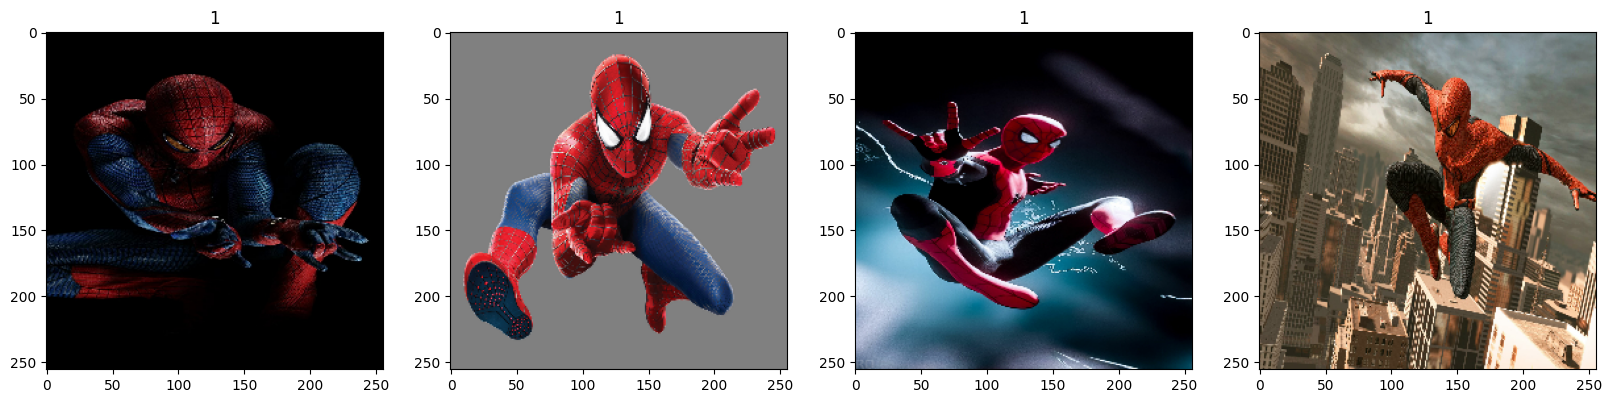

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

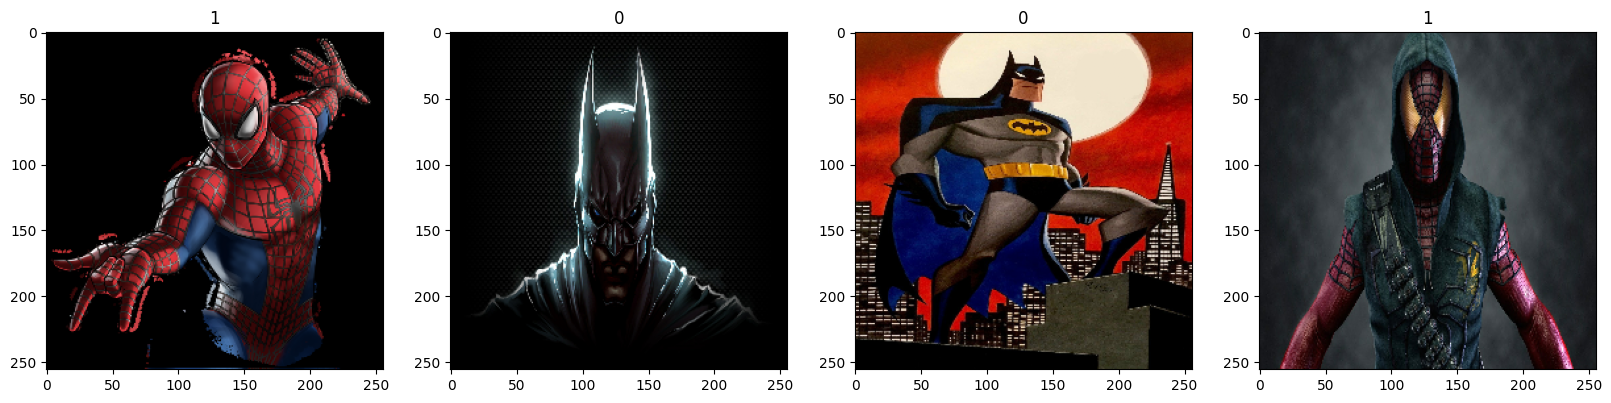

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)
#batch size

7

In [ ]:
train_size = int(len(data)*.7)
val_size = int (len(data)*.2)+1
test_size = int(len(data)*.1)+1
train_size+ val_size +test_size

7

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten, Dropout
#conv2d 2d covolution layer,condense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='log'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 10s 2s/step - loss: 1.2922 - accuracy: 0.4583 - val_loss: 0.6510 - val_accuracy: 0.5833
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6832 - accuracy: 0.5000 - val_loss: 0.6666 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6840 - accuracy: 0.6250 - val_loss: 0.6519 - val_accuracy: 0.8333
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6163 - accuracy: 0.8542 - val_loss: 0.5086 - val_accuracy: 0.7917
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.5536 - accuracy: 0.7708 - val_loss: 0.5202 - val_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.4552 - accuracy: 0.8125 - val_loss: 0.4334 - val_accuracy: 0.8333
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.3549 - accuracy: 0.8542 - val_loss: 0.3207 - val_accuracy: 0.9167
Epoch 8/20
4/4 [========================

In [ ]:
hist.history

{'loss': [1.2922183275222778,
  0.6831526756286621,
  0.6839988231658936,
  0.6163243055343628,
  0.5535511374473572,
  0.45524564385414124,
  0.35493919253349304,
  0.2513204514980316,
  0.1348864585161209,
  0.14863885939121246,
  0.1315983682870865,
  0.048481326550245285,
  0.03858068212866783,
  0.020933976396918297,
  0.07093960046768188,
  0.017074646428227425,
  0.010384462773799896,
  0.026400500908493996,
  0.004099844489246607,
  0.006697490811347961],
 'accuracy': [0.4583333432674408,
  0.5,
  0.625,
  0.8541666865348816,
  0.7708333134651184,
  0.8125,
  0.8541666865348816,
  0.8958333134651184,
  0.9583333134651184,
  0.9583333134651184,
  0.9375,
  1.0,
  1.0,
  1.0,
  0.9791666865348816,
  1.0,
  1.0,
  0.9791666865348816,
  1.0,
  1.0],
 'val_loss': [0.6510292887687683,
  0.6666289567947388,
  0.6519055366516113,
  0.508631706237793,
  0.5202462673187256,
  0.4334096908569336,
  0.32068321108818054,
  0.11135578155517578,
  0.13018955290317535,
  0.10362578183412552,
 

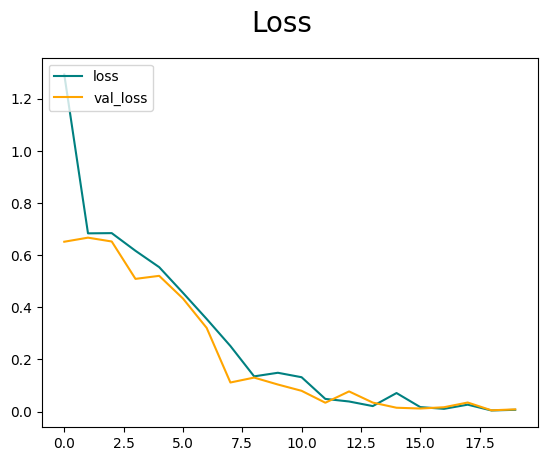

In [ ]:
fig= plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

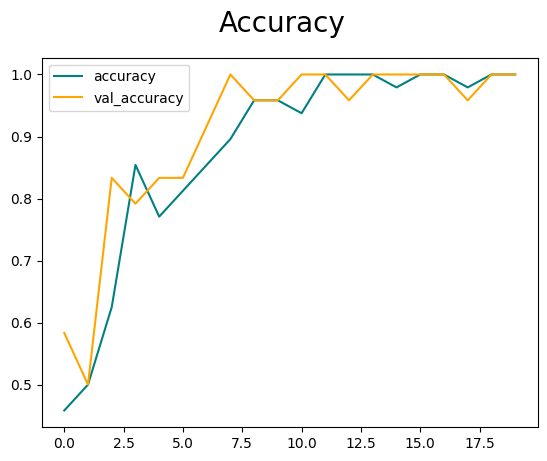

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y=batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 224ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Accuracy: 1.0


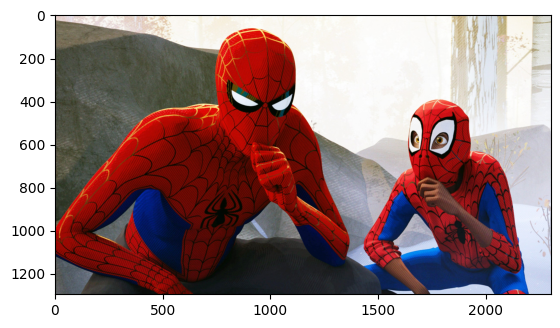

In [ ]:
img = cv2.imread('testimg.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

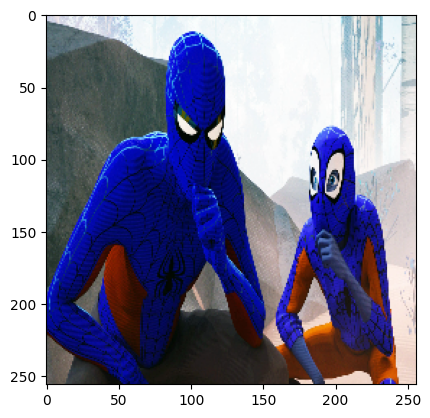

In [ ]:
resize = tf.image.resize(img,(256,256))

plt.imshow(resize.numpy().astype(int))
#plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 87ms/step


In [ ]:
if yhat>0.5:
  print(f'Predicted class is Spiderman')
else:
  print(f'Predicted class is Batman')

Predicted class is Spiderman


In [ ]:
model.save('batandspiderclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model')

In [ ]:
model.save('my_mondel.keras')